In [37]:
# import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import to_categorical

In [18]:
# import dataset using pandas
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [19]:
# descriptive statistics
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [20]:
# create a dataframe for those with a loan and those without
loan_df = bank_df[bank_df['Personal Loan'] == 1]
no_loan_df = bank_df[bank_df['Personal Loan'] == 0]

In [21]:
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [22]:
no_loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


C:\Users\there\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\there\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

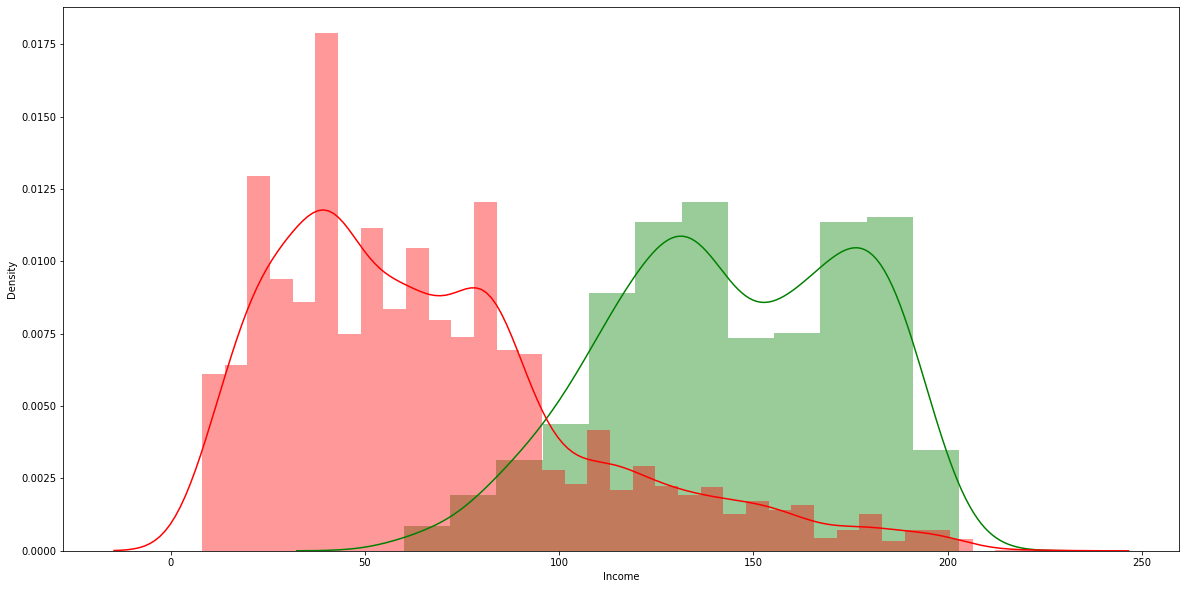

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(loan_df['Income'],color = 'g')
sns.distplot(no_loan_df['Income'],color = 'r')

In [38]:
# obtain features we wish to use for our NN model
X = bank_df.drop(columns=['Personal Loan'])
# obtain our target output and convert to categorical
Y = to_categorical(bank_df['Personal Loan'])

In [39]:
# scale data for our model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [40]:
# split data into training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)

In [54]:
# create keras sequential model
ANN_model = keras.Sequential()

# add dense layer

ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

# implement regularization to prevent overfitting
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation='linear'))

ANN_model.add(Dropout(0.4))

# dense layer with softmax activation since we want the output to be saturated
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 250)               3500      
_________________________________________________________________
dropout_21 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 500)               125500    
_________________________________________________________________
dropout_22 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_23 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 500)               250500    
__________

In [55]:
# compile model
ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit training data to model

history = ANN_model.fit(X_train, Y_train, epochs = 12, validation_split = 0.2, verbose = 1)

Train on 3600 samples, validate on 900 samples
Epoch 1/12
3600/3600 [==============================] - 3s 702us/sample - loss: 0.1838 - acc: 0.9358 - val_loss: 0.0967 - val_acc: 0.9667
Epoch 2/12
3600/3600 [==============================] - 2s 443us/sample - loss: 0.1017 - acc: 0.9614 - val_loss: 0.0727 - val_acc: 0.9700
Epoch 3/12
3600/3600 [==============================] - 2s 439us/sample - loss: 0.0939 - acc: 0.9669 - val_loss: 0.0668 - val_acc: 0.9756
Epoch 4/12
3600/3600 [==============================] - 2s 449us/sample - loss: 0.0688 - acc: 0.9764 - val_loss: 0.0688 - val_acc: 0.9789
Epoch 5/12
3600/3600 [==============================] - 2s 459us/sample - loss: 0.0691 - acc: 0.9744 - val_loss: 0.0666 - val_acc: 0.9767
Epoch 6/12
3600/3600 [==============================] - 2s 451us/sample - loss: 0.0678 - acc: 0.9739 - val_loss: 0.0507 - val_acc: 0.9833
Epoch 7/12
3600/3600 [==============================] - 2s 449us/sample - loss: 0.0608 - acc: 0.9786 - val_loss: 0.0596 - val

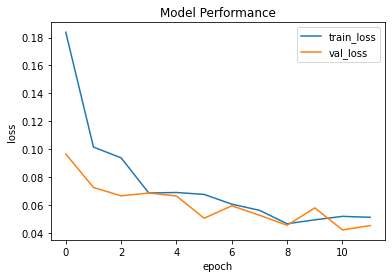

In [56]:
# plot performance of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'],loc='upper right')
plt.show()

In [57]:
# make predictions
predictions = ANN_model.predict(X_test)

# append index of max value
predict = []
for i in predictions:
    predict.append(np.argmax(i))
    
# get accuracy of the model
result = ANN_model.evaluate(X_test,Y_test)

print('Accuracy: {}'.format(result[1]))

500/500 [==============================] - 0s 102us/sample - loss: 0.0867 - acc: 0.9700
Accuracy: 0.9700000286102295


<AxesSubplot:>

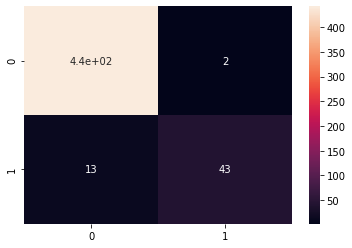

In [59]:
# get original values
y_original = []

for i in Y_test:
    y_original.append(np.argmax(i))
    
# plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_matrix, annot = True)

In [60]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       0.96      0.77      0.85        56

    accuracy                           0.97       500
   macro avg       0.96      0.88      0.92       500
weighted avg       0.97      0.97      0.97       500

